In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = tardb.FmriTarDataset('data/affvids2018_mc_zrest_norest.tar')

In [6]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

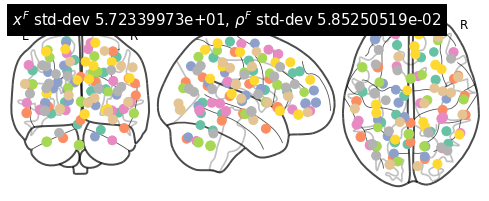

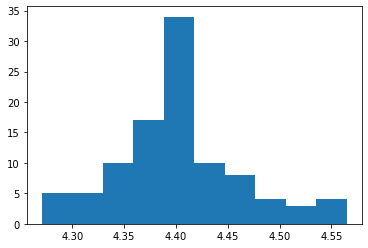

(<nilearn.plotting.displays.OrthoProjector at 0x7fe0ab240950>,
 tensor([[ 26.9618,   5.0874,  17.0820],
         [-15.8873, -60.6308,   3.4390],
         [-13.6180,  41.6594,  36.5685],
         [ 40.1916, -62.1332,  -7.4967],
         [-14.5844, -31.6657,  67.8344],
         [ 38.3137, -48.9972,  50.9912],
         [ 11.6075,  28.6479,  14.9493],
         [-50.0404,  -7.3833,  37.2120],
         [-30.5171, -39.7444,  -8.2298],
         [ -2.6645, -62.6918, -19.8883],
         [ 21.7179, -49.4384, -25.5534],
         [ 25.0638,  34.3451,  34.9167],
         [ -6.0330, -11.7272,  47.9143],
         [  0.4946, -60.3374,  30.3133],
         [-51.9188, -55.0178,  21.5457],
         [ 57.6416, -11.4606,  23.3914],
         [ 46.2674,   6.1935, -23.7087],
         [-33.9027,  18.4916,  -1.2286],
         [-56.3229, -17.5723,  -7.7864],
         [ 58.4736, -31.9054,  10.6657],
         [  0.4731, -40.2153, -15.2047],
         [ 15.6676, -78.1793,  25.1676],
         [-17.9749, -77.1428, -34.1

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=256, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True))

08/06/2021 19:17:30 [Epoch 1] (61220ms) ELBO -1.12513728e+08 = log-likelihood -1.11745832e+08 - KL from prior 7.67875000e+05
08/06/2021 19:17:30 Saving checkpoint...
08/06/2021 19:17:47 [Epoch 2] (17412ms) ELBO -2.43931900e+07 = log-likelihood -2.37292060e+07 - KL from prior 6.63987250e+05
08/06/2021 19:18:05 [Epoch 3] (17398ms) ELBO -2.40320840e+07 = log-likelihood -2.34367760e+07 - KL from prior 5.95308625e+05
08/06/2021 19:18:22 [Epoch 4] (17398ms) ELBO -2.37054660e+07 = log-likelihood -2.31866900e+07 - KL from prior 5.18771812e+05
08/06/2021 19:18:39 [Epoch 5] (17387ms) ELBO -2.34704920e+07 = log-likelihood -2.29866560e+07 - KL from prior 4.83832156e+05
08/06/2021 19:18:57 [Epoch 6] (17426ms) ELBO -2.32895580e+07 = log-likelihood -2.28030960e+07 - KL from prior 4.86460594e+05
08/06/2021 19:19:14 [Epoch 7] (17411ms) ELBO -2.31144200e+07 = log-likelihood -2.26577660e+07 - KL from prior 4.56658625e+05
08/06/2021 19:19:32 [Epoch 8] (17420ms) ELBO -2.29677840e+07 = log-likelihood -2.252

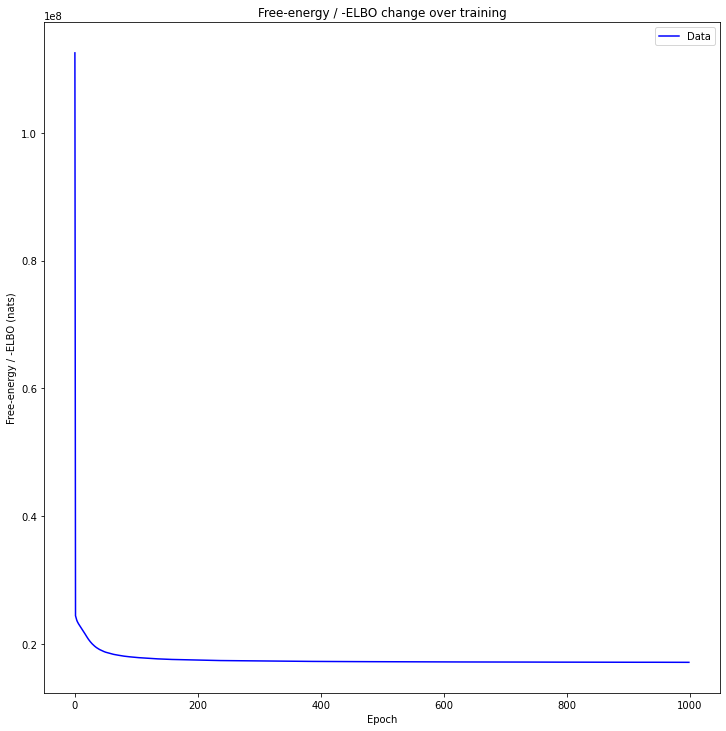

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


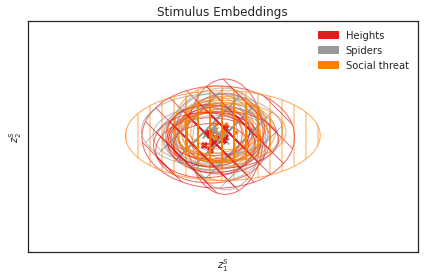

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


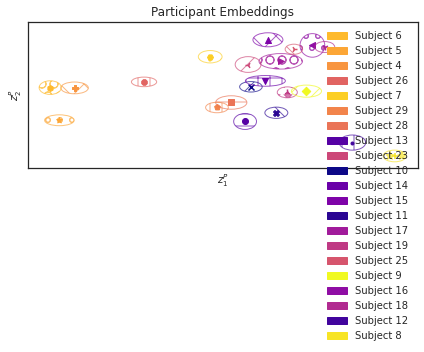

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

08/07/2021 00:05:31 Plotting factors for Participant 29, run 3


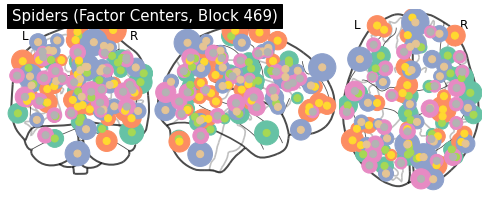

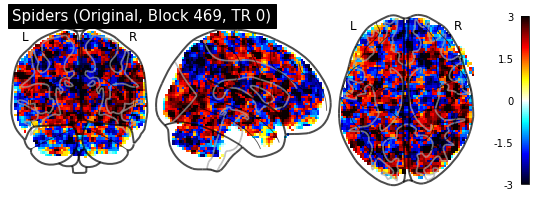

08/07/2021 00:05:36 Reconstruction Error (Frobenius Norm): 3.04063690e+02 out of 2.97979340e+02


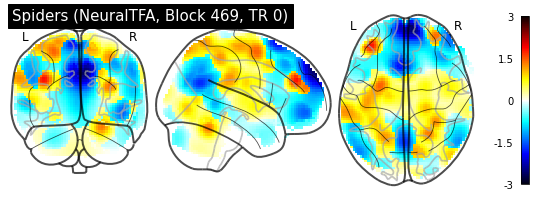

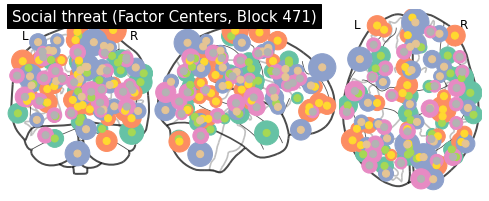

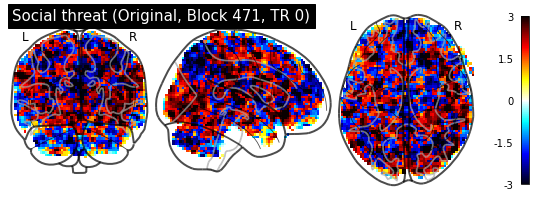

08/07/2021 00:05:42 Reconstruction Error (Frobenius Norm): 3.01980896e+02 out of 2.97979340e+02


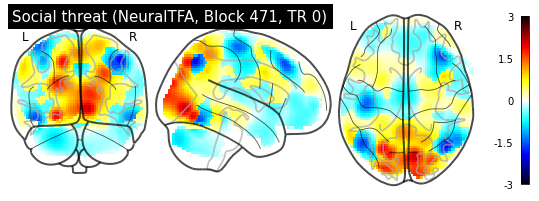

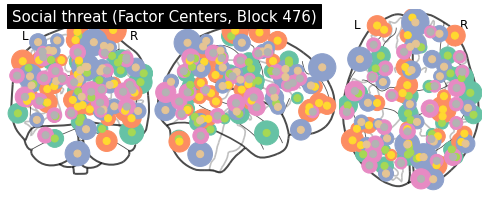

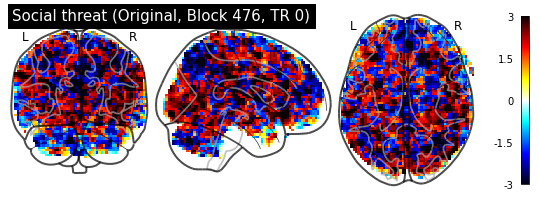

08/07/2021 00:05:47 Reconstruction Error (Frobenius Norm): 3.24867828e+02 out of 2.97979340e+02


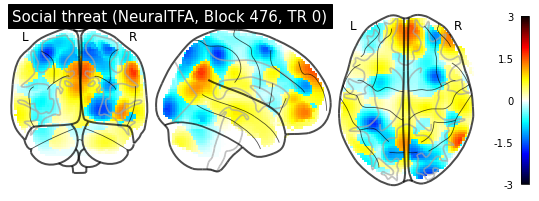

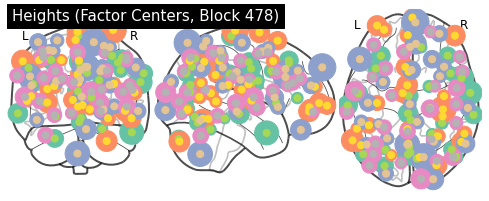

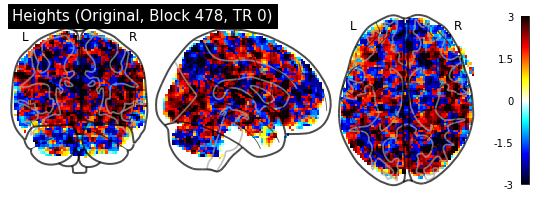

08/07/2021 00:05:53 Reconstruction Error (Frobenius Norm): 3.17677521e+02 out of 2.97979340e+02


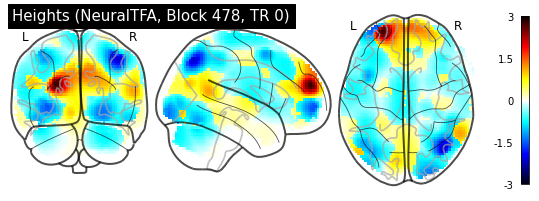

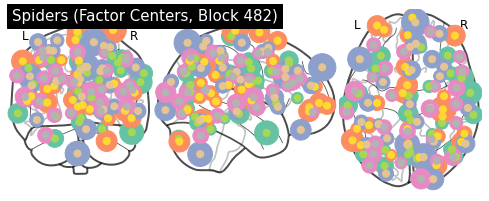

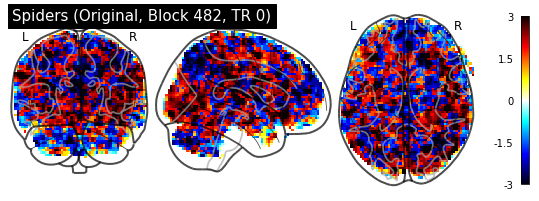

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
08/07/2021 00:05:59 Reconstruction Error (Frobenius Norm): 2.97979340e+02 out of 2.97979340e+02


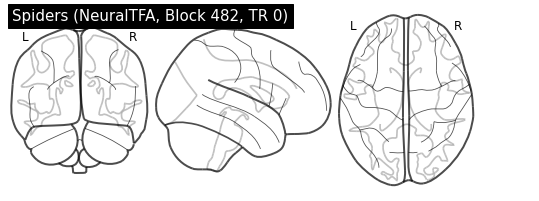

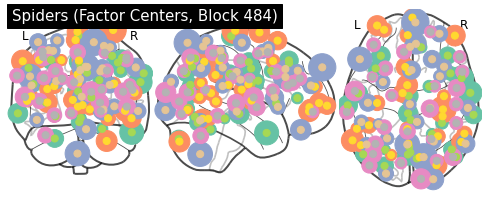

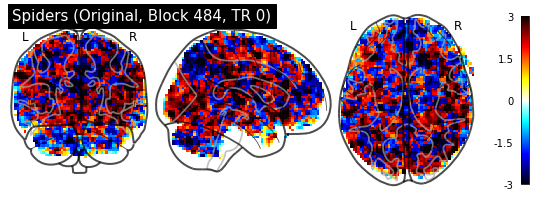

08/07/2021 00:06:05 Reconstruction Error (Frobenius Norm): 3.26662994e+02 out of 2.97979340e+02


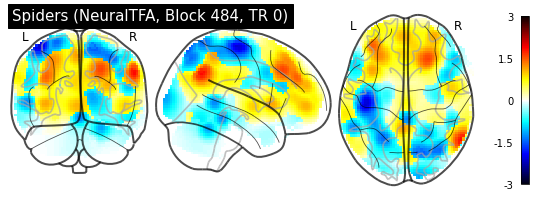

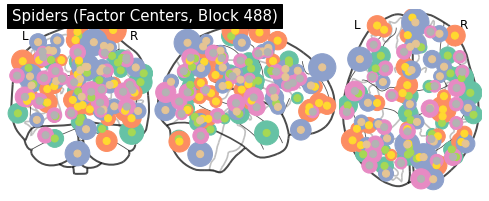

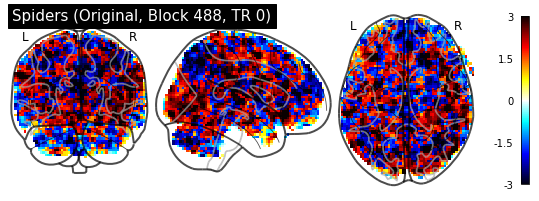

08/07/2021 00:06:10 Reconstruction Error (Frobenius Norm): 3.18564667e+02 out of 2.97979340e+02


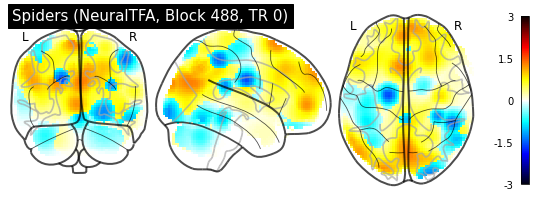

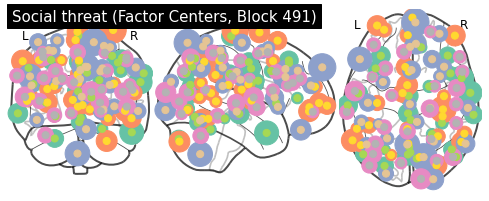

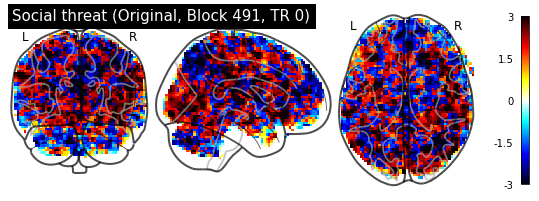

08/07/2021 00:06:16 Reconstruction Error (Frobenius Norm): 3.16529266e+02 out of 2.97979340e+02


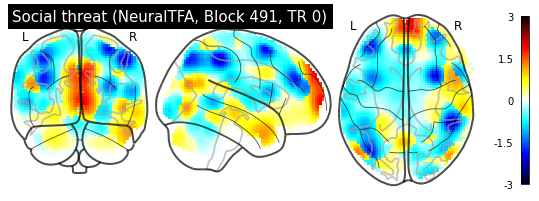

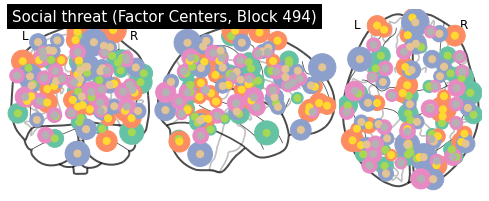

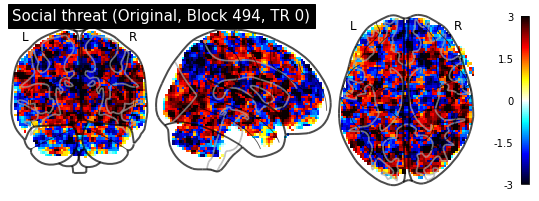

08/07/2021 00:06:22 Reconstruction Error (Frobenius Norm): 3.26790710e+02 out of 2.97979340e+02


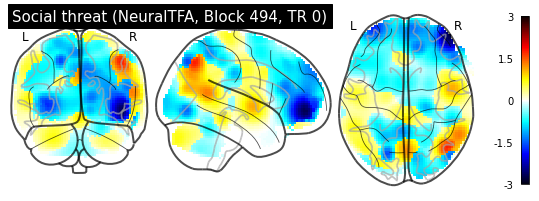

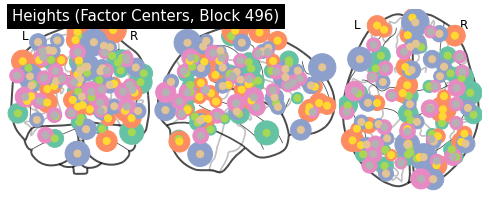

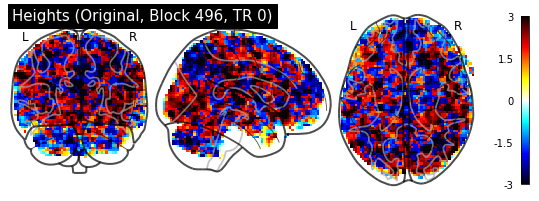

08/07/2021 00:06:28 Reconstruction Error (Frobenius Norm): 3.05495026e+02 out of 2.97979340e+02


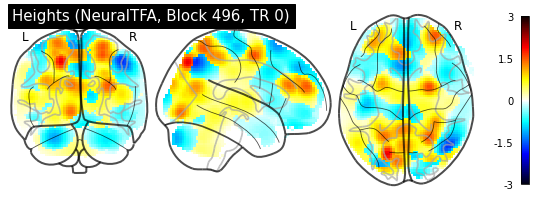

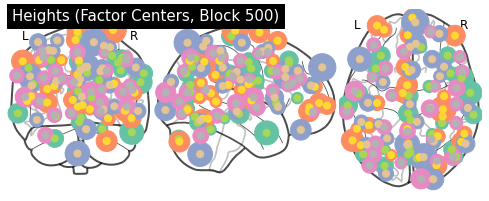

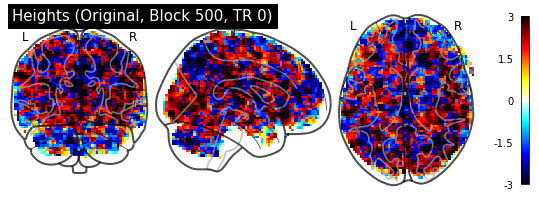

08/07/2021 00:06:33 Reconstruction Error (Frobenius Norm): 3.79259674e+02 out of 2.97979340e+02


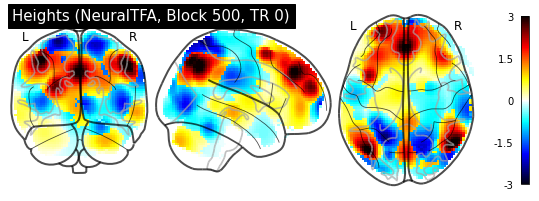

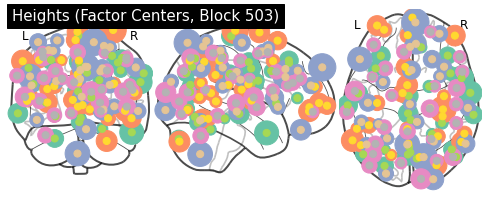

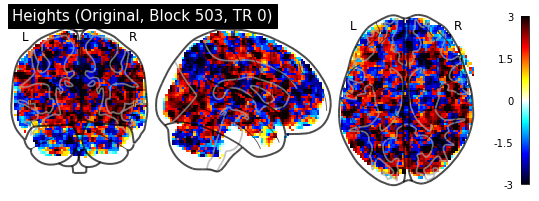

08/07/2021 00:06:39 Reconstruction Error (Frobenius Norm): 3.05448883e+02 out of 2.97979340e+02


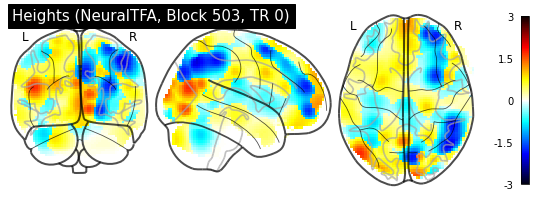

In [17]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

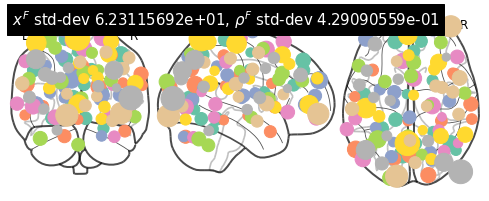

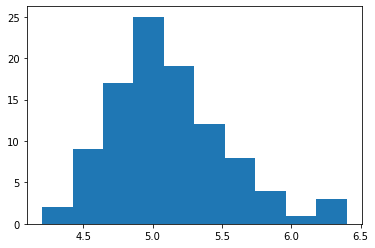

(<nilearn.plotting.displays.OrthoProjector at 0x7fdff86409d0>,
 tensor([[ 2.3745e+01,  4.5335e+00,  1.4611e+01],
         [-7.6828e+00, -7.3418e+01,  7.0412e+00],
         [-1.5470e+01,  4.5371e+01,  4.8231e+01],
         [ 4.8372e+01, -6.8951e+01, -3.5820e+00],
         [-1.5165e+01, -3.6756e+01,  7.0160e+01],
         [ 4.3021e+01, -6.1853e+01,  5.3777e+01],
         [ 4.1602e+00,  3.5378e+01,  2.2058e+01],
         [-4.8599e+01, -1.0333e+01,  3.7310e+01],
         [-2.9463e+01, -4.5771e+01, -1.3219e+01],
         [ 5.6553e+00, -6.1756e+01, -1.3369e+01],
         [ 2.4511e+01, -4.9756e+01, -2.3981e+01],
         [ 1.1711e+01,  4.5764e+01,  3.7798e+01],
         [-3.3917e+00, -9.9808e+00,  5.6456e+01],
         [ 5.6699e-01, -7.3318e+01,  4.0099e+01],
         [-5.7126e+01, -6.8072e+01,  2.2598e+01],
         [ 6.4036e+01, -2.0432e+01,  3.3051e+01],
         [ 4.6950e+01,  1.0866e+01, -2.6867e+01],
         [-3.9407e+01,  1.5351e+01, -9.4205e-01],
         [-5.8056e+01, -1.2653e+01, -

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

08/07/2021 00:08:46 Average reconstruction error (MSE): 1.13122731e+00
08/07/2021 00:08:46 Average data norm (Euclidean): 1.06019845e+00
08/07/2021 00:08:46 Percent average reconstruction error: 0.373946


(1.1312273105125101, 1.0601984541627694, 0.0037394574344711507)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

08/07/2021 00:10:50 Average reconstruction error (MSE): 1.45531918e+03 +/- 5.10122400e+01
08/07/2021 00:10:50 Average data norm (Euclidean): 1.36450842e+03 +/- 2.93222358e+01
08/07/2021 00:10:50 Percent average reconstruction error: 106.657479 +/- 3.03923997e+00


(array([1393.32824707, 1322.39367676, 1425.79528809, 1442.27844238,
        1432.27380371, 1445.0020752 , 1330.36376953, 1454.7364502 ,
        1422.18725586, 1366.11767578, 1483.34399414, 1458.43591309,
        1365.87036133, 1429.75671387, 1433.02075195, 1373.64221191,
        1402.49621582, 1406.70129395, 1448.19116211, 1426.39355469,
        1401.49047852, 1428.49865723, 1452.27258301, 1435.4642334 ,
        1399.74291992, 1523.30065918, 1413.87915039, 1479.34814453,
        1452.2635498 , 1428.59375   , 1443.7722168 , 1395.84191895,
        1406.19433594, 1441.93371582, 1398.36462402, 1457.31115723,
        1438.26818848, 1460.31982422, 1429.9317627 , 1410.11083984,
        1451.34313965, 1513.76525879, 1423.74523926, 1440.13415527,
        1403.50439453, 1504.30834961, 1528.60327148, 1419.11022949,
        1440.96252441, 1382.77307129, 1461.52893066, 1513.11413574,
        1460.78234863, 1461.17492676, 1423.14355469, 1503.62182617,
        1464.56176758, 1475.03100586, 1436.78283

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

AttributeError: 'DeepTFA' object has no attribute '_blocks'

In [ ]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

In [ ]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

In [ ]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

In [ ]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')